# Final project guidelines

**Note:** Use these guidelines if and only if you are pursuing a **final project of your own design**. For those taking the final exam instead of the project, see the (separate) final exam notebook.

## Guidelines

These guidelines are intended for **undergraduates enrolled in INFO 3350**. If you are a graduate student enrolled in INFO 6350, you're welcome to consult the information below, but you have wider latitude to design and develop your project in line with your research goals.

### The task

Your task is to: identify an interesting problem connected to the humanities or humanistic social sciences that's addressable with the help of computational methods, formulate a hypothesis about it, devise an experiment or experiments to test your hypothesis, present the results of your investigations, and discuss your findings.

These tasks essentially replicate the process of writing an academic paper. You can think of your project as a paper in miniature.

You are free to present each of these tasks as you see fit. You should use narrative text (that is, your own writing in a markdown cell), citations of others' work, numerical results, tables of data, and static and/or interactive visualizations as appropriate. Total length is flexible and depends on the number of people involved in the work, as well as the specific balance you strike between the ambition of your question and the sophistication of your methods. But be aware that numbers never, ever speak for themselves. Quantitative results presented without substantial discussion will not earn high marks. 

Your project should reflect, at minimum, ten **or more** hours of work by each participant, though you will be graded on the quality of your work, not the amount of time it took you to produce it. Most high-quality projects represent twenty or more hours of work by each member.

#### Pick an important and interesting problem!

No amount of technical sophistication will overcome a fundamentally uninteresting problem at the core of your work. You have seen many pieces of successful computational humanities research over the course of the semester. You might use these as a guide to the kinds of problems that interest scholars in a range of humanities disciplines. You may also want to spend some time in the library, reading recent books and articles in the professional literature. **Problem selection and motivation are integral parts of the project.** Do not neglect them.

### Format

You should submit your project as a Jupyter notebook (and corresponding PDF version), along with all data necessary to reproduce your analysis. If your dataset is too large to share easily, let us know in advance so that we can find a workaround. If you have a reason to prefer a presentation format other than a notebook, likewise let us know so that we can discuss the options.

Your report should have four basic sections (provided in cells below for ease of reference):

1. **Introduction and hypothesis.** What problem are you working on? Why is it interesting and important? What have other people said about it? What do you expect to find?
2. **Corpus, data, and methods.** What data have you used? Where did it come from? How did you collect it? What are its limitations or omissions? What major methods will you use to analyze it? Why are those methods the appropriate ones?
3. **Results.** What did you find? How did you find it? How should we read your figures? Be sure to include confidence intervals or other measures of statistical significance or uncetainty where appropriate.
4. **Discussion and conclusions.** What does it all mean? Do your results support your hypothesis? Why or why not? What are the limitations of your study and how might those limitations be addressed in future work?

Within each of those sections, you may use as many code and markdown cells as you like. You may, of course, address additional questions or issues not listed above.

All code used in the project should be present in the notebook (except for widely-available libraries that you import), but **be sure that we can read and understand your report in full without rerunning the code**. Unexecuted code or illegible PDF output will receive no credit. Be sure, too, to explain what you're doing along the way, both by describing your data and methods and by writing clean, well commented code.

### Grading

This project takes the place of the take-home final exam for the course. It is worth 35% of your overall grade. You will be graded on the quality and ambition of each aspect of the project. No single component is more important than the others.

### Practical details

* The project is due at **noon on Wednesday, December 18** via upload to CMS of a single zip file containing your fully executed Jupyter notebook report, a PDF copy of the notebook, and all associated data.
* You may work alone or in a group of up to three total members.
    * If you work in a group, be sure to list the names of the group members.
    * For groups, create your group on CMS and submit one notebook for the entire group. **Each group should also submit a statement of responsibility** that describes in general terms who performed which parts of the project.
* You may post questions on Ed, but should do so privately (visible to course staff only).
* Interactive visualizations do not always work when embedded in shared notebooks. If you plan to use interactives, you may need to host them elsewhere and link to them.

---

## Your info
* NetID(s): brb227
* Name(s): Ben Bigdelle
---

## 1. Introduction and hypothesis

Chile, like many South American countries over the past century, has experienced a history marked by both democratic aspirations and oppressive authoritarianism. On September 11th, 1973, a military coup led by Augusto Pinochet, a right-wing authoritarian figure, overthrew the democratically elected socialist government of Salvador Allende.

I will explore the contrasting rhetoric used by Salvador Allende and Augusto Pinochet in their speeches and official communications to understand how these leaders articulated their vision of government. Furthermore, I will examine how counter-resistance literature emerged during Pinochet’s rule, offering a critique of authoritarianism and aligning thematically with Allende’s ideals of solidarity, equity, and freedom.

This research is significant because it ties together the rhetoric of political leadership with the cultural resistance that was brought about by this oppression. Understanding these dynamics can show how language were used to resist oppression and to preserve hope. There has been work done to examine the rhetoric of Allende and Pinochet, but this work has not employed NLP and langauge information tools like this research project. 

The central question guiding this research is: How did the contrasting rhetorical strategies of Salvador Allende and Augusto Pinochet reflect their differing visions of governance, and how did counter-resistance literature respond to and critique Pinochet’s authoritarian regime?

Based on previous context and background knowledge, I hypothesize that Allende’s rhetoric will emphasize themes of democracy, solidarity, and unity while Pinochet’s focus will be on control, order, fear, and suppression. I also expect resistance literature to align more closely with Allende’s themes.

## 2. Data and methods

Below, I show the data collection, how I found these pieces, and the types of processing I did to do my analysis. 

First, I have all my imports (similar to how we did in the homework) for my project:

In [1]:
# imports
import pdfplumber
import os
import re
from fuzzywuzzy import fuzz
from tqdm import tqdm
import json
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import spacy
import umap.umap_ as umap
import numpy as np

### 2.1 Creating the dataset
To get this data, I identified a few types of datasets that I wanted to create for this project:
- Allende speeches
- Allende presidential communications
- Pinochet speeches
- Pinochet presidential communications
- Resistance literature

#### 2.1.1 Getting the Allende Speeches
First, I found a pdf of an assortment of speeches that Allende has delivered, and downloaded this file. This contained over 1000 pages of his work, but the pdf was incredibly inconcistently formatted, and splitting this into a list of his speeches would require a lot of manual work. Therefore, I first converted it into a .txt file and saved that using the following:

In [ ]:
pdf_path = "data/allende_era/salvador_allende_speeches.pdf"
all_speeches = []

with pdfplumber.open(pdf_path) as pdf:
    for page in pdf.pages:
        text = page.extract_text()
        if text:
            all_speeches.append(text)

full_text = "\n".join(all_speeches)

with open("data/allende_era/allende_speeches_19722.txt", "w", encoding="utf-8") as f:
    f.write(full_text)

Then, I went about to try to clean the .txt file, first by identifying that there was a footer at the bottom of each page that said "BIBLIOTECA CLODOMIRO ALMEYDA" followed by a number. This was captured by converting the pdf to a txt file, so I had to remove these by using the following function to match these with a regex pattern, and stripping those lines from the .txt file. 

At the beginning of the txt file there is also a table of contents where speech titles were followed by a series of "." and finally a page number. My plan to process this document was to save all of these speech names in a set, then iterate through each line in order to find where one speech starts and another one ends. Therefore, I also wrote a function to clean the speech titles to remove the "." and page number. These two functions are implemented and run below:

In [242]:
def remove_entries(input_file, output_file):
    pattern = r"BIBLIOTECA CLODOMIRO ALMEYDA \d+"
    
    with open(input_file, "r", encoding="utf-8") as file:
        content = file.read()
    
    cleaned_content = re.sub(pattern, "", content)
    
    with open(output_file, "w", encoding="utf-8") as file:
        file.write(cleaned_content)
    
    print(f"Processed file saved to: {output_file}")

def clean_speech_titles(input_file, output_file):
    with open(input_file, "r", encoding="utf-8") as file:
        lines = file.readlines()
    
    processed_lines = []
    for i, line in enumerate(lines):
        if i < 291:
            cleaned_line = re.sub(r"\.{2,}\s*\d+$", "", line.strip())
            processed_lines.append(cleaned_line)
        else:
            processed_lines.append(line.strip())
    
    with open(output_file, "w", encoding="utf-8") as file:
        file.write("\n".join(processed_lines))
    
    print(f"Processed file saved to: {output_file}")

input_file = "data/allende_era/allende_speeches_1972.txt"
output_file = "data/allende_era/allende_speeches_1972.txt"

# Call the function
clean_speech_titles(input_file, output_file)

Processed file saved to: data/allende_era/allende_speeches_1972.txt


Now, in order to make get this .txt file closer to being ready to process into a dataset, I removed all the blank lines from the file:

In [3]:
def remove_blank_lines(input_file, output_file=None):
    """
    Remove blank lines from a text file.

    Args:
        input_file (str): Path to the input text file.
        output_file (str, optional): Path to the output file. 
                                     If None, overwrites the input file.

    Returns:
        None
    """
    if output_file is None:
        output_file = input_file
    with open(input_file, 'r') as file:
        lines = file.readlines()
    
    non_blank_lines = [line for line in lines if line.strip()]

    with open(output_file, 'w') as file:
        file.writelines(non_blank_lines)

# Example usage:
remove_blank_lines('data/allende_era/allende_speeches_1972.txt', 'data/allende_era/allende_speeches_1972.txt')


Now, I have a txt file with no blank line and a titles.json file which contains all the titles for the speeches in this book. Some of the titles fo the speeches may be separated into several lines, so it is not as simple as just going line by line to find some match to a title in our titles.json file. Therefore, for each line I see if the line exceeds a threshold similarity for the next title we are looking for, and if so, add this to the title. Otherwise, this means we are not in a "title block" and we are in the block of text of the actual speech, so I add a blank line after the title and replace the potential multi-line title with one single line. This leaves the text have only a blank line after the start of some speech, where the previous line is the title, and our file is finally ready to split into all of the speeches:

In [2]:
with open("data/allende_era/titles.json", "r", encoding="utf-8") as f:
    titles_data = json.load(f)
    titles = titles_data["titles"]

with open("data/allende_era/allende_speeches_1972.txt", "r", encoding="utf-8") as f:
    book_text = f.read()

def process_text(titles, text, threshold=90):
    """
    Preprocess text to identify titles spanning multiple lines and add a blank line after them.

    Parameters:
        titles (list): List of known titles.
        text (str): The book text.
        threshold (int): The minimum similarity score to consider a match.

    Returns:
        str: Preprocessed text with blank lines added after titles.
    """
    lines = text.splitlines()
    processed_lines = []
    current_title_index = 0
    in_title_block = False
    title_buffer = []

    for i in tqdm(range(len(lines)), desc="Processing lines"):
        if current_title_index >= len(titles):
            processed_lines.extend(lines[i:])
            break

        current_line = lines[i].strip()
        match_score = fuzz.partial_ratio(current_line, titles[current_title_index])

        if match_score >= threshold:
            in_title_block = True
            title_buffer.append(current_line)
        elif in_title_block:
            combined_title = " ".join(title_buffer)
            processed_lines.append(combined_title)
            processed_lines.append("")
            title_buffer = []
            in_title_block = False
            current_title_index += 1 
            processed_lines.append(current_line)
        else:
            processed_lines.append(current_line)

    if title_buffer:
        combined_title = " ".join(title_buffer)
        processed_lines.append(combined_title)
        processed_lines.append("")

    return "\n".join(processed_lines)


# Preprocess the text
book_text = process_text(titles, book_text)
with open("data/allende_era/cleaned_allende_speeches_1972.txt", "w", encoding="utf-8") as f:
    f.write(book_text)

Processing lines:  99%|█████████▉| 38972/39417 [00:00<00:00, 74682.32it/s]


Here, I simply construct the dataset by going through the entire txt file, and creating a new file (1.txt, 2.txt, etc) in the data/allende_era/allende_speeches directory for each new speech encountered, which I find by using the pattern that I left the unprocessed txt file in from the previous step:

So, I:
- Iterate through each line
- If the line is blank, this means that the previous line is the title
- Copy all the text until the next blank line
- Store this as a new file in the output directory

In [2]:
def split_text_into_files_via_blank_line(text_file, output_dir):
    with open(text_file, "r", encoding="utf-8") as file:
        text = file.read()

    os.makedirs(output_dir, exist_ok=True)

    lines = text.splitlines()

    current_speech = []
    file_index = 1

    for i, line in enumerate(tqdm(lines, desc="Processing lines")):
        if i + 1 < len(lines) and lines[i + 1].strip() == "":

            if current_speech:
                with open(os.path.join(output_dir, f"{file_index}.txt"), "w", encoding="utf-8") as file:
                    file.write("\n".join(current_speech).strip())
                file_index += 1

            current_speech = [line]
        else:
            current_speech.append(line)

    if current_speech:
        with open(os.path.join(output_dir, f"{file_index}.txt"), "w", encoding="utf-8") as file:
            file.write("\n".join(current_speech).strip())

text_file = "data/allende_era/cleaned_allende_speeches_1972.txt"
output_dir = "data/allende_era/allende_speeches"
split_text_into_files_via_blank_line(text_file, output_dir)


Processing lines: 100%|██████████| 38035/38035 [00:00<00:00, 1220444.12it/s]


Now, I create a dataframe (to be used with our analysis tasks) from these speeches, which gives us a dataset of 97 speeches delivered by Allende:

In [2]:
def create_dataframe_from_speeches(titles_file, speeches_dir):
    """
    Reads speech files from the directory and matches them with titles to create a DataFrame.
    
    Args:
    - titles_file (str): Path to the JSON file containing official titles.
    - speeches_dir (str): Path to the directory containing speech `.txt` files.

    Returns:
    - pd.DataFrame: A DataFrame with columns 'Title' and 'Text'.
    """
    with open(titles_file, "r", encoding="utf-8") as file:
        titles = json.load(file)["titles"]
    
    speeches = []
    for i, file_name in enumerate(sorted(os.listdir(speeches_dir), key=lambda x: int(x.split('.')[0]))):
        if file_name.endswith(".txt"):
            with open(os.path.join(speeches_dir, file_name), "r", encoding="utf-8") as speech_file:
                lines = speech_file.readlines()
                # exclude first two lines (blank space and the title)
                speech_text = "".join(lines[2:]).strip()
                speeches.append({"title": titles[i], "text": speech_text})
    
    df = pd.DataFrame(speeches)
    return df

titles_file = "data/allende_era/titles.json"
speeches_dir = "data/allende_era/allende_speeches"

df = create_dataframe_from_speeches(titles_file, speeches_dir)
df.head()


,title,text
0,Discurso de Salvador Allende sobre la acusació...,Queridas compañeras y estimados compañeros:\nE...
1,Carta a Luis Corvalán en el 50 aniversario del PC,Senador\nLUIS CORVALAN L.\nSecretario General ...
2,DESDE LOS BALCONES DE LA INTENDENCIA DE CONCEP...,"Pueblo de Concepción. Autoridades civiles, mil..."
3,CONFERENCIA DE PRENSA OFRECIDA EN LA INTENDENC...,"PERIODISTA: (GILDA HENRIQUEZ, Radio Cooperativ..."
4,EN LA MUNICIPALIDAD DE TALCAHUANO 9.02.72,"Compañero Alcalde, Regidores de la Ilustre Mun..."


#### 2.1.2 Getting the annual Allende/Pinochet presidential messages

Each year, the Chilean president gives an official address to the nation regarding the countries progress, and goals for the future (similar to the State of the Union address in the USA). I compiled a list of these for Pinochet and Allende. I retrieved these by simpling making a .txt file for each of the presidential messages that were available in the Digital Library of Chile (http://bibliotecadigital.dipres.gob.cl/handle/11626/22138). This included all of the presidential messages for Allende while he was President (1970-1973) and the presidential messages from 1980-1989 for Pinochet. 
- NOTE: while Pinochet was also President during the years of 1973-1980, the official PDFs of these documents is several hundreds of pages and also a poor scan, meaning that it would take manual transcription to put these in my dataset, which I don't have the realistic ability to do.

I manually put these into a directory in my data folder, and then I created a dataframe from these files in the following way:

In [3]:
def create_dataframe_from_files(directory):
    """
    Create a pandas DataFrame from text files in a directory.
    
    Args:
        directory (str): Path to the directory containing text files.
    
    Returns:
        pd.DataFrame: A DataFrame with 'Title' and 'Text' columns.
    """
    data = []
    
    for file_name in sorted(os.listdir(directory), key=lambda x: int(os.path.splitext(x)[0])):
        file_path = os.path.join(directory, file_name)
        
        if os.path.isfile(file_path) and file_name.endswith(".txt"):
            with open(file_path, "r", encoding="utf-8") as file:
                text = file.read().strip()  # strip the whitespace
                data.append({"title": os.path.splitext(file_name)[0], "text": text})
    
    df = pd.DataFrame(data)
    return df

directory_path = "data/allende_era/presidential_messages"
df_allende = create_dataframe_from_files(directory_path)

display(df_allende.head())

,title,text
0,1971,Al comparecer ante ustedes para cumplir con el...
1,1972,"Secretario del Senado, señor Pelagio Figueroa\..."
2,1973,Debemos ser plenamente conscientes de los prob...


In [4]:
directory_path = "data/pinochet_era/presidential_messages"
df_pinochet = create_dataframe_from_files(directory_path)
display(df_pinochet.head())

,title,text
0,1980,A poco más de cuatro meses del día en que el p...
1,1981,Al conmemorarse este 11 de Septiembre de 1981 ...
2,1982,Al cumplirse hoy un nuevo aniversario de la Li...
3,1983,Señoras y señores:\nAl conmemorar hoy el décim...
4,1984,"Conciudadanos:\nComo todos los años, en esta f..."


#### 2.1.3 Getting speeches by Pinochet

The historical record of Pinochet's speeches is notably incomplete, with many documents either classified or absent from Chilean digital archives. This reflects a broader challenge in accessing materials from authoritarian regimes, where records are often deliberately suppressed or poorly preserved. Also, given that I am looking for speeches, the transcription of these texts is not always available, which means that I would have to listen to and transcribe text to ensure it is reliably copied. This is infeasible for a project of this length. 

Therefore, to build this dataset, I manually compiled speeches from various scattered sources, relying on whatever was available through external archives, libraries, and online collections. I put this into a similar format as the Allende speeches within the data/pinochet_era/speeches directory and creating a dataframe as follows:

In [5]:
titles_file = "data/pinochet_era/titles.json"
speeches_dir = "data/pinochet_era/speeches"
df_pinochet_speeches = create_dataframe_from_speeches(titles_file, speeches_dir)
display(df_pinochet_speeches.head())

,title,text
0,Primer comunicado de la Junta Militar (11 de s...,1.- El Presidente de la República debe procede...
1,Entrevista a Pinochet: 10 años de gobierno (SE...,"SEMANA: Al cumplir 10 años de su gobierno, ¿cu..."
2,"Discurso de Augusto Pinochet, al dar cuenta de...",Al conmemorarse un nuevo aniversario del pronu...
3,"Carta a los chilenos (Londes, diciembre de 1988)","«Impedido de regresar a mi país, y viviendo la..."
4,Discurso de Augusto Pinochet con motivo del tr...,Inicio estas palabras con la gratitud por vues...


#### 2.1.4 Getting the resistance texts

This process was manual, as there is no good database for the resistance literary pieces at the time. Therefore, I researched the Nueva Cancion movement in Chile, which was a strong anti-Pinochet form of music that focused on the working people of the country. From there, I found a few resources indicating which texts and artists led this movement, and put all these pieces into the data/pinochet_era/resistance_writing directory. Then, I made a dataframe like before to get these pieces ready for analysis. 

Because of the way each file is formatted, I did the following:
- Read the first line into the title of a new row of the dataframe
- Use all the non-blank line text below it as the "text" of the new row.

In [6]:
def create_dataframe_from_txt(directory):
    """
    Reads all .txt files in a directory and creates a DataFrame with 'Title' and 'Text' columns.

    Args:
        directory (str): The path to the directory containing the .txt files.

    Returns:
        pd.DataFrame: A DataFrame with two columns: 'Title' and 'Text'.
    """
    data = []

    for file_name in os.listdir(directory):
        if file_name.endswith('.txt'):
            file_path = os.path.join(directory, file_name)

            with open(file_path, 'r', encoding='utf-8') as file:
                lines = file.readlines()

                if len(lines) < 3:  # Ensure the file has at least title, blank line, and text
                    continue

                # Extract title from the first line
                title = lines[0].strip()

                # Extract the text starting from the third line
                text = "".join(line.strip() for line in lines[2:])

                # Append title and text to the data list
                data.append({"title": title, "text": text})

    df = pd.DataFrame(data)
    return df

directory_path = "data/pinochet_era/resistance_writing"
df_resistance = create_dataframe_from_txt(directory_path)
display(df_resistance.head())

,title,text
0,"""La Pajita"" - Inti-Illimani",Esta que era una niña de ceraPero no era una n...
1,"""A la Molina no voy más"" - Victor Jara",Yuca de San Borjasamorengue sapara ir a saña¡a...
2,"""Ojos Azules"" - Inti-Illimani",Ojos azules no lloresNo llores ni te enamoresO...
3,"""Medianoche"" - Inti-Illimani",Ven a beber conmigo en doce copasDoce campanas...
4,"""Plegaria A Un Labrador"" - Victor Jara",Levántate y mira la montañaDe donde viene el v...


#### 2.1.4 Putting this all data together

After all of this processing and data collection, I now have the following five datasets:
- Allende speeches (97 total)
- Pinochet speeches (13 total)
- Allende Annual Presidential Messages (3 total - one for each year as president)
- Pinochet Annual Presidential Messages (10 total)
- Resistance literature work (24 total)

The Allende and Pinochet texts offer insights into their differing political rhetoric, while the resistance texts provide a counterpoint to Pinochet's authoritarian regime. This is a good representation of the the themes and rhetoric of each group, but there are some limitation and ommissions. 

1. First, it should be noted that the transcription techniques for large pdfs is still not very strong, and for that reason it is impossible to accurately transcribe the provided scans of the presidential messages of Pinochet from 1974-1980, as these documents are hundreds of pages long and would require a manual transcription. 
2. There is not a strong existing dataset or repository of speeches by Pinochet, as there are incomplete historical records for his time as President.
3. This is a novel project, and there is NO existing public strong dataset for these speeches and literary works. Therefore, constructing this by hand and some processing tools requires immense amounts of work, so while this is a good representation of the era, it is definitely not all-encompassing. This dataset took me over 7 hours alone to put together, but it is clear and evident that it would be helpful to work with Chilean researchers and historians to help construct a truly representative dataset of each era.
4. Another issue with this data is the over-emphasis on some areas. I have 97 public Allende speeches, while only 13 for Pinochet. Part of the reason, again, is that there are full books for Allende's public record, while not so much so for Pinochet.

### 2.2 Methods

To analyze the rhetoric and themes of the texts, I will use the following techniques:

    Text Preprocessing: Because of the nature of my dataset being fully in spanish, it requires a different type of text preprocessing than what we have seen in class. I will use SpaCy libraries "es_core_news_sm" in order to get rid of stopwords as well as lemmatize the words themselves (so a word like "hablando" becomes "hablar").

    Topic Modeling with LDA: LDA is used to uncover underlying themes in the texts, so I will use this to analyze each group of texts. LDA groups co-occurring words into topics, allowing us to identify the primary themes present in the speeches. I use either CountVectorizer or TfidfVectorizer to convert the text into numerical feature matrices, depending on whether word frequency or uniqueness is more relevant. This is very practical usecase, as I am interested in the underlying rhetoric behind each group of texts, and this models that so we can see what is important or inherent to the nature of the text.

    Clustering with SVD: SVD reduces the high-dimensional text data into two components, enabling visualization and interpretation. SVD retains the most significant features of the data while reducing noise, making it particularly useful for exploratory analysis. We will use this with K-Means by applying the SVD data to identify groups of texts with similar rhetorical or thematic structures. This helps us determine if speeches from different leaders form distinct clusters, indicating divergent rhetorical strategies.

	To analyze the most common word patterns in the texts, I will extract and visualize n-grams, which are sequences of n consecutive words. Using CountVectorizer from the sklearn library, I generate these n-grams from the processed text column of the dataset. Specifically, I focus on bigrams and trigrams (n=2, 3) to uncover frequent word combinations that may indicate recurring themes or expressions. After computing n-gram frequencies, I display the top N most common ones using bar plots for better interpretation of their significance.

	To assess the linguistic style of the texts, I calculate the frequencies of specific parts of speech such as pronouns, verbs, adjectives, and adverbs using SpaCy's POS tagging. Each text undergoes preprocessing and tokenization, after which the counts for each POS category are accumulated and displayed. This breakdown highlights the syntactic composition of the texts, revealing stylistic tendencies like the use of descriptive adjectives or verbs. Analyzing linguistic style helps uncover how texts convey their messages. For example, frequent use of pronouns may indicate a direct and personal tone, while a high occurrence of verbs or adverbs might suggest a call-to-action narrative. By analyzing these elements, we can better understand the rhetorical strategies employed.

These are the proper tools because of what I am interested in finding, which is the the tone or underlying rhetoric of the messages of each group. Topic modeling uncovers hidden themes, while dimensionality reduction and clustering provide a visual representation of patterns, helping to compare and contrast rhetorical styles.

Below, I define all the functions necessary for these methods:

#### 2.2.1 Processing + Lemmatization

In [8]:
nlp = spacy.load("es_core_news_sm")

def preprocess_text(text):
        """
        Preprocess the text by lowercasing and removing stopwords.
        """
        # tokens = text.lower().split()
        # tokens = [word for word in tokens if word.isalpha() and word not in spanish_stopwords]
        # return " ".join(tokens)
        doc = nlp(text.lower())
        tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
        return " ".join(tokens)


#### 2.2.2 Analyzing themes with LDA

In [7]:
def vectorizer_simplified(df, use_tfidf=False, features=1000, minimum_df= .001):
    vectorizer_class = TfidfVectorizer if use_tfidf else CountVectorizer
    vectorizer = vectorizer_class(
        max_features=features,
        encoding="utf-8",
        strip_accents="unicode",
        lowercase=True,
        min_df=minimum_df,
    )
    X = vectorizer.fit_transform(df["processed_text"])
    return vectorizer, X


def analyze_themes(df, num_topics=5, num_words=10, features=10000, minimum_df=0.001, use_tfidf=False):
    """
    Perform theme analysis using LDA on a DataFrame containing speech titles and text.

    Args:
        df (pd.DataFrame): A DataFrame with 'title' and 'text' columns.
        num_topics (int): Number of topics to discover.
        num_words (int): Number of words to display per topic.

    Returns:
        None: Prints the topics and their associated words.
    """
    df["processed_text"] = df["text"].apply(preprocess_text)

    vectorizer, X = vectorizer_simplified(df, use_tfidf=use_tfidf, features=features, minimum_df=minimum_df)

    lda = LatentDirichletAllocation(
        n_components=num_topics,
        n_jobs=-1,
        verbose=1,
        max_iter=10,
        evaluate_every=0,
    )
    lda.fit(X)

    feature_names = vectorizer.get_feature_names_out()
    print("Themes discovered (Topics and their top words):")
    for topic_idx, topic in enumerate(lda.components_):
        top_words = [feature_names[i] for i in topic.argsort()[-num_words:][::-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

#### 2.2.3 Clustering with SVD

In [9]:
def svd_clustering_analysis(df1, df2, num_components=2, num_clusters=2, use_tfidf=True, title="", label1="Allende", label2= "Pinochet"):
    """
    Perform SVD and clustering to check if speeches from two DataFrames form different clusters.

    Args:
        df1 (pd.DataFrame): First dataframe to combine.
        df2 (pd.DataFrame): Second dataframe to combine.
        num_components (int): Number of dimensions for SVD.
        num_clusters (int): Number of clusters for KMeans.

    Returns:
        None: Displays a 2D plot of clusters.
    """
    df1["processed_text"] = df1["text"].apply(preprocess_text)
    df2["processed_text"] = df2["text"].apply(preprocess_text)

    df1["Label"] = label1
    df2["Label"] = label2
    combined_df = pd.concat([df1, df2], ignore_index=True)

    _, tfidf_matrix = vectorizer_simplified(combined_df, use_tfidf=use_tfidf, features=10000, minimum_df=0.001)

    svd = TruncatedSVD(n_components=num_components)
    svd_matrix = svd.fit_transform(tfidf_matrix)

    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(svd_matrix)

    combined_df["Cluster"] = cluster_labels

    plt.figure(figsize=(10, 7))
    for cluster in range(num_clusters):
        cluster_points = svd_matrix[combined_df["Cluster"] == cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")

    for i, label in enumerate(combined_df["Label"]):
        plt.text(svd_matrix[i, 0], svd_matrix[i, 1], label, fontsize=8, alpha=0.7)

    plt.title(title)
    plt.xlabel("SVD Component 1")
    plt.ylabel("SVD Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

#### 2.2.4 N-Gram Analysis

In [10]:
def extract_ngrams(spec_df, n=2, top_n=20):
    """
    Extracts the top N most common n-grams from the text column of the DataFrame.

    Args:
        df (pd.DataFrame): DataFrame containing a 'text' column.
        n (int): The size of the n-grams (1 for unigrams, 2 for bigrams, etc.).
        top_n (int): Number of top n-grams to display.

    Returns:
        Counter: A Counter object with the most common n-grams and their counts.
    """
    spec_df["processed_text"] = spec_df["text"].apply(preprocess_text)

    vectorizer = CountVectorizer(ngram_range=(n, n))
    X = vectorizer.fit_transform(spec_df["processed_text"])

    ngram_counts = X.sum(axis=0).A1
    ngram_features = vectorizer.get_feature_names_out()
    ngram_counter = Counter(dict(zip(ngram_features, ngram_counts)))
    return ngram_counter.most_common(top_n)

def plot_ngrams(ngrams, title):
    """
    Plot the top n-grams and their frequencies.

    Args:
        ngrams (list): A list of tuples with n-grams and their frequencies.
        title (str): Title for the plot.
    """
    ngram_df = pd.DataFrame(ngrams, columns=["N-gram", "Frequency"])
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Frequency", y="N-gram", data=ngram_df, hue="N-gram", dodge=False, palette="viridis", legend=False)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("N-gram")
    plt.tight_layout()
    plt.show()

#### 2.2.5 Linguistic Style

In [11]:
def analyze_linguistic_style(df):
    """
    Analyze linguistic style by calculating the frequencies of specific parts of speech or stylistic elements.

    Args:
        df (pd.DataFrame): DataFrame containing a 'text' column.

    Returns:
        None: Prints analysis results.
    """
    df["processed_text"] = df["text"].apply(preprocess_text)

    pronoun_counts = Counter()
    verb_counts = Counter()
    adjective_counts = Counter()
    adverb_counts = Counter()

    for text in df["processed_text"]:
        doc = nlp(text)
        for token in doc:
            if token.pos_ == "PRON":
                pronoun_counts[token.text] += 1
            elif token.pos_ == "VERB":
                verb_counts[token.text] += 1
            elif token.pos_ == "ADJ":
                adjective_counts[token.text] += 1
            elif token.pos_ == "ADV":
                adverb_counts[token.text] += 1

    print("Top Pronouns:", pronoun_counts.most_common(10))
    print("Top Verbs:", verb_counts.most_common(10))
    print("Top Adjectives:", adjective_counts.most_common(10))
    print("Top Adverbs:", adverb_counts.most_common(10))

## 3. Results

### Analyzing themes by Allende's speeches

In [11]:
analyze_themes(df, num_topics=15, num_words=5)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
Themes discovered (Topics and their top words):
Topic 1: el, gobierno, pais, chile, companero
Topic 2: trabajador, gobierno, el, ano, pais
Topic 3: mujer, el, ano, companero, chile
Topic 4: chile, pueblo, companero, el, aplauso
Topic 5: pais, pueblo, chile, economico, hombre
Topic 6: mundialmente, terrorismo, jalisco, difamacion, derechos
Topic 7: joven, universidad, pais, juventud, pueblo
Topic 8: pais, chile, pueblo, presidente, senor
Topic 9: deporte, pais, club, deportivo, nino
Topic 10: mundialmente, terrorismo, jalisco, difamacion, derechos
Topic 11: pais, pueblo, chile, gobierno, el
Topic 12: municipalidad, el, chile, pais, gobierno
Topic 13: gobierno, regimen, el, partido, institucional
Topic

Now, lets analyze the themes that I uncovered for the dataframe containing a list of Allende's speeches (the dataset of 97 total texts). Words like gobierno (government), país (country), pueblo (people), and chile, which dominate Topics 1, 5, and 11, reflect Allende’s deep focus on national identity, governance, and his connection to the Chilean people. His use of trabajador (worker) in Topic 2 highlights his ability to bring working class people into the country's political conversation. Also, this shows vision of creating a fairer, more equitable society. Similarly, terms like pueblo and compañero (comrade) in Topic 4 show how central solidarity and collective action were to his rhetoric—language that feels inclusive and aimed at building a shared purpose among Chileans. There are also several instances of "derechos" (rights), which indicates his commitment to focusing on the rights of Chileans in his government.

### Analyzing Presidential Addresses by Allende


In [13]:
analyze_themes(df_allende, num_topics=5, num_words=5, features=100)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
Themes discovered (Topics and their top words):
Topic 1: pequeno, pleno, republica, senor, presidente
Topic 2: senor, social, economico, excelentisimo, sesion
Topic 3: pequeno, pleno, republica, senor, presidente
Topic 4: pequeno, pleno, republica, senor, presidente
Topic 5: gobierno, el, social, pueblo, pais


Allende was only president for 3 years, and thus only gave 3 annual Presidential Addresses, so the number of themes we use is only 5 here. The themes in Allende's presidential addresses reflect his tone and focus on governance, the economy, and the people. Words like república (republic), presidente (president), and pleno (session) dominate Topics 1, 3, and 4, emphasizing the institutional and parliamentary nature of these speeches. This suggests that Allende’s addresses often centered around formal settings, addressing government processes, and reinforcing his role as a leader within the democratic framework.

In Topic 2, the inclusion of social, económico (economic), and sesión (session) underscores his focus on economic and social reform focus of Allende's presidency. These terms suggest a strong emphasis on addressing economic justice and societal well-being, core aspects of his socialist agenda. Finally, Topic 5, with words like gobierno (government), social, pueblo (people), and país (country), points to a broader vision where governance and the empowerment of the Chilean people are tightly interconnected. Allende’s rhetoric here is consistent with his commitment to a government rooted in social responsibility and the betterment of the nation as a whole. These themes collectively highlight Allende’s efforts to balance formal governance with his aspirations for social change and inclusivity.

### Analayzing by Pinochet's Speeches


In [14]:
analyze_themes(df_pinochet_speeches, num_topics=5, num_words=5)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
Themes discovered (Topics and their top words):
Topic 1: pais, chile, chileno, el, militar
Topic 2: gobierno, trabajador, chileno, pais, chile
Topic 3: chileno, gobierno, pais, fuerza, chile
Topic 4: gobierno, el, chile, etapa, chileno
Topic 5: ejercito, mando, institucion, patria, ano


Pinochet’s speeches, by contrast, focus more heavily on themes of nationalism, military authority, and institutional control. Words like país (country), chile, and chileno (Chilean), which dominate Topics 1, 2, and 3, highlight a strong emphasis on national identity and patriotism, often framing Chile as central to his discourse. The repeated use of militar (military), ejército (army), and mando (command) in Topics 1 and 5 underscores the militarized tone of Pinochet’s rhetoric, reflecting his leadership as a military dictator and his reliance on institutional power to assert control.

Additionally, terms like gobierno (government), institución (institution), and etapa (stage) in Topics 4 and 5 suggest a focus on governance and the structure of power, likely tied to Pinochet's efforts to justify his regime and its policies as part of a necessary institutional transformation. The inclusion of trabajador (worker) in Topic 2 may reflect attempts , similar to Allende, to bring in "average" Chilean into the political conversation. Overall, Pinochet’s language appears to reinforce a vision of order, discipline, and national strength, prioritizing control over solidarity and favoring military and institutional themes over the people-centered rhetoric seen in Allende’s speeches.

### Analyzing Presidential Addresses by Pinochet

In [20]:
analyze_themes(df_pinochet, num_topics=5, num_words=5)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
Themes discovered (Topics and their top words):
Topic 1: rol, inspirar, optimismo, experimentar, chiie
Topic 2: lidar, empeno, conformidad, tamente, pragmatico
Topic 3: lidar, empeno, conformidad, tamente, pragmatico
Topic 4: lidar, empeno, conformidad, tamente, pragmatico
Topic 5: pais, gobierno, sector, ano, chile


These texts are an assortment of Pinochet's Annaul Presidential Messages from 1980-1989. This dataset of Pinochet’s speeches introduces a notable shift in tone, with themes centering on optimism, effort, and pragmatism. Words like rol (role), inspirar (inspire), optimismo (optimism), and experimentar (experiment) in Topic 1 signal an attempt to project a hopeful vision for Chile. This suggests that Pinochet was likely trying to frame his leadership as innovative and optimistic, aligning his regime with notions of progress and experimentation, perhaps to counter criticisms of authoritarianism.

The recurrence of words like lidar (to lead), empeño (effort), conformidad (compliance), and pragmático (pragmatic) across Topics 2, 3, and 4 underscores a focus on discipline, perseverance, and practical governance. These terms emphasize a narrative of order, effort, and realism—key themes in Pinochet’s rhetoric as he sought to justify his rule as necessary for Chile's stability and economic recovery. Finally, Topic 5, with words like país (country), gobierno (government), and sector (sector), reflects his continued emphasis on national governance.

### Analzying anti-Pinochet, resistance texts

In [15]:
analyze_themes(df_resistance, num_topics=5, num_words=5)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
Themes discovered (Topics and their top words):
Topic 1: derecho, vivir, fundir, volar, nochear
Topic 2: cuba, querer, pie, iresi, mano
Topic 3: sangre, decir, llamar, el, canto
Topic 4: vida, tantome, mirar, caray, fondo
Topic 5: querer, mano, hermano, tierra, fiero


The themes emerging from the resistance texts reveal a strikingly different tone compared to both Allende and Pinochet’s speeches. Words like vivir (to live), fundir (to forge), and volar (to fly) in Topic 1 convey a sense of hope, freedom, and renewal. This language reflects a desire to break free from oppression and to envision a brighter, liberated future. In Topic 3, words like sangre (blood), llamar (to call), and canto (song) emphasize themes of sacrifice, struggle, and unity, suggesting a deep emotional connection to the fight against injustice and a call to collective action.

The presence of querer (to want), mano (hand), and hermano (brother) in Topics 2 and 5 highlights solidarity, love, and camaraderie as central values of the resistance. These words reflect the human connection and shared struggle among those opposing the regime, grounding the resistance in relationships and community. Additionally, terms like tierra (land) and fondo (depth) in Topics 4 and 5 evoke ties to the land and a fight for fundamental rights, linking the resistance to deeper cultural and national roots.

Overall, the resistance texts combine poetic and emotive language with themes of sacrifice, solidarity, and hope. Unlike Pinochet’s cold pragmatism or Allende’s institutional focus, the resistance writings prioritize humanity, emotion, and vision. They serve as a powerful counter-narrative, speaking to the resilience and spirit of those who refused to be silenced.

### Clustering between Allende and Pinochet Presidential messages

Below I will be performing a clustering analysis (with two clusters) in order to show the difference between Allende and Pinochet speeches, to see if there is a divide and to what extent. 

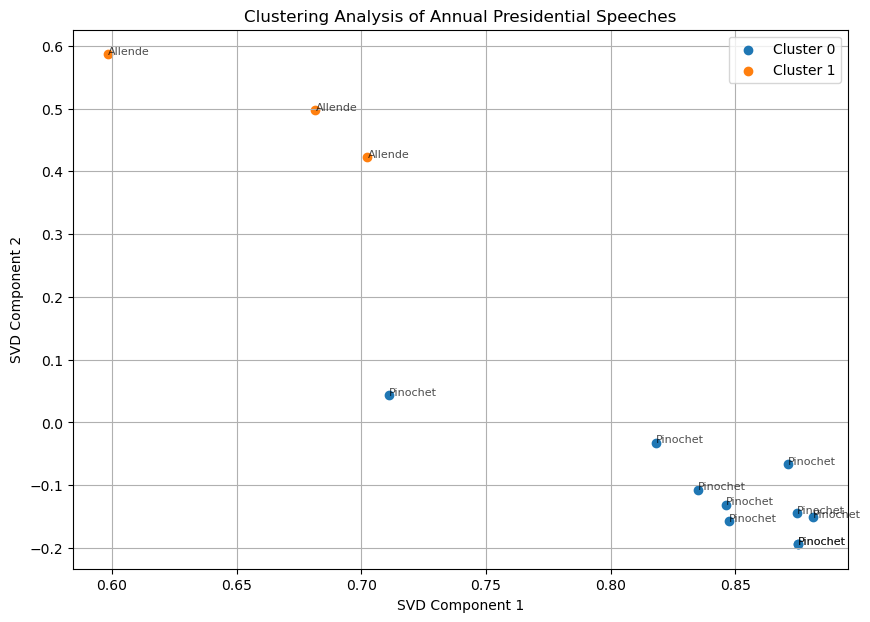

In [16]:
svd_clustering_analysis(df_allende, df_pinochet, num_components=2, num_clusters=2, use_tfidf=True, title="Clustering Analysis of Annual Presidential Speeches")

The graph shows two clusters: Cluster 0 (blue) dominated by Pinochet’s speeches and Cluster 1 (orange) containing Allende’s speeches. The clear separation between the clusters reflects differences in the language, tone, and focus of their addresses. Allende's speeches occupy a higher position on the second SVD component, but is also less tightly bound, suggesting they have more varied features. As we saw in the previous theme analysis, the rhetoric and undertones are focused on inclusion, hope, and change.

Pinochet’s speeches, on the other hand, are tightly grouped in Cluster 0 with lower values on SVD Component 2, indicating a more consistent and uniform tone across his speeches. This clustering aligns with his pragmatic, bureaucratic, and militarized language that frequently emphasized control, governance, and national strength as we saw from the previous theme analysis. The density of Pinochet’s speeches suggests a narrower, more repetitive use of language, reinforcing his regime's focus on discipline and conformity.

### Clustering between Pinochet Speeches and Resistance pieces

I will not perform clustering with k=2 clusters to see the difference and divide between Pinochet's speeches and resistnace pieces, which are a combined dataset of texts, poems, songs, and short stories. Although these two types of literature are different by nature (one is a series of speeches and the other contains artistic pieces), it will still show the underlying differences between these two corpuses.

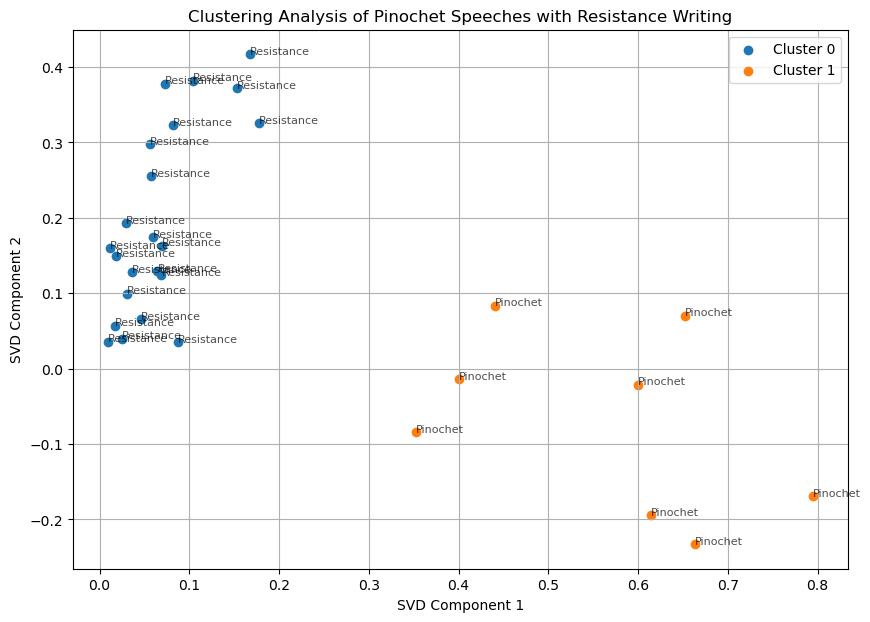

In [17]:
svd_clustering_analysis(df_resistance, df_pinochet_speeches, num_components=2, num_clusters=2, use_tfidf=True, title="Clustering Analysis of Pinochet Speeches with Resistance Writing", label1="Resistance", label2="Pinochet")

The graph shows a clear distinction between the two clusters: Cluster 0 (blue) contains the resistance writings, while Cluster 1 (orange) includes Pinochet’s speeches. The resistance texts are tightly grouped in the upper-left portion of the graph, indicating consistent linguistic patterns and themes—likely focused on solidarity, struggle, and emotional rhetoric, as seen in earlier topic analyses. The proximity and narrow range of these points reflect a unified, collective voice centered on human connection, hope, and resistance.

On the other hand, Pinochet’s speeches occupy a distinct and more dispersed region of the graph, stretching across the horizontal axis (SVD Component 1). This spread suggests more variation in his rhetoric. The separation between the two clusters highlights the stark contrast in tone and content: Pinochet’s speeches are formal, policy-driven, and authoritarian, whereas the resistance writings are personal, poetic, and emotionally charged. This clustering underscores the ideological divide between Pinochet’s regime and the resistance movement, both in message and in the way their language resonated with their respective audiences.

When we think about this in the context of the time, it is clear and evident that these resistance pieces, which were incredibly popular in the era, provided a radically different form of rhetoric compared to Pinochet's authoritarian and official messages.

### N-gram analysis

Top N-grams for Allende Speeches:

Top 1-grams:
chile: 2493
él: 2469
país: 2387
pueblo: 2257
gobierno: 2141
compañero: 1758
trabajador: 1622
año: 1566
chileno: 1192
presidente: 1076


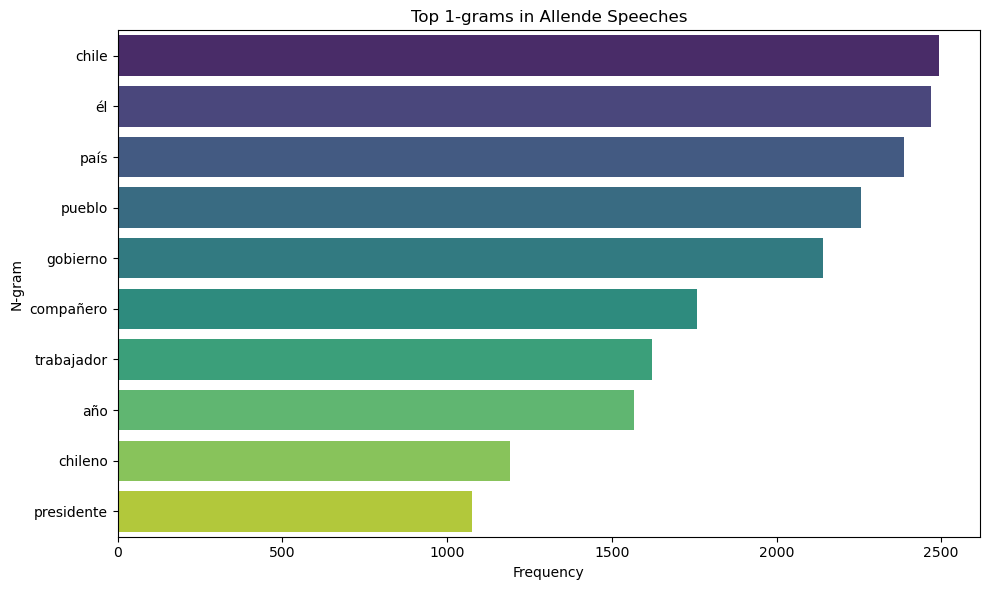


Top 2-grams:
millón dólares: 401
unidad popular: 319
decir él: 263
proceso revolucionario: 209
dar él: 198
gobierno popular: 179
presidente república: 177
pueblo chile: 177
compañero presidente: 160
hombre mujer: 138


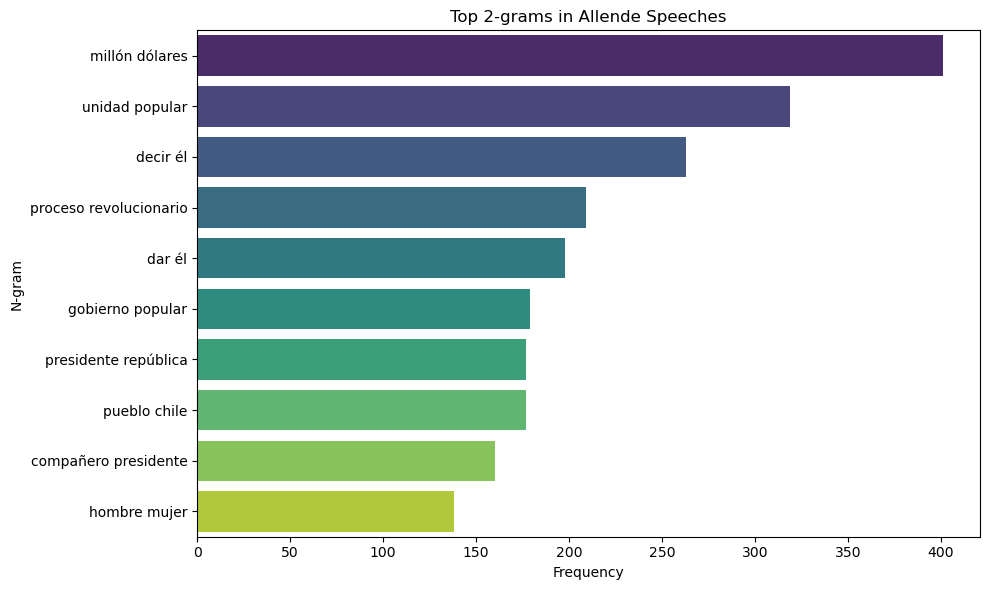


Top 3-grams:
millón dólares año: 59
central única trabajador: 56
querer decir él: 52
área social economía: 46
país vías desarrollo: 44
partido unidad popular: 43
servicio nacional salud: 40
compañera estimado compañero: 39
programa unidad popular: 38
empleado técnico profesional: 34


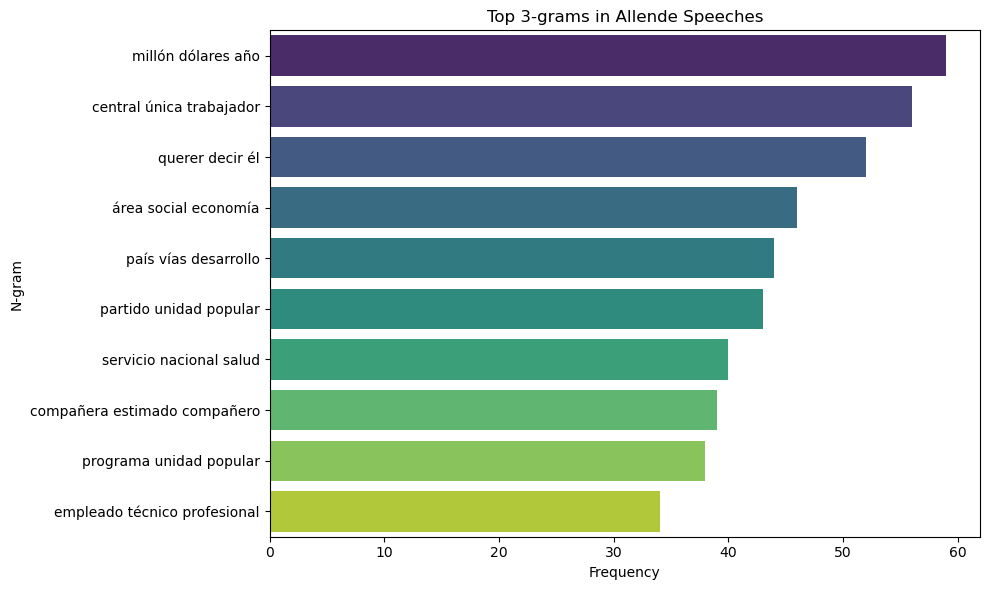

Top N-grams for Allende Presidential Messages:

Top 1-grams:
gobierno: 162
social: 146
él: 131
país: 122
económico: 121
señor: 107
pueblo: 104
trabajador: 84
chile: 83
popular: 79


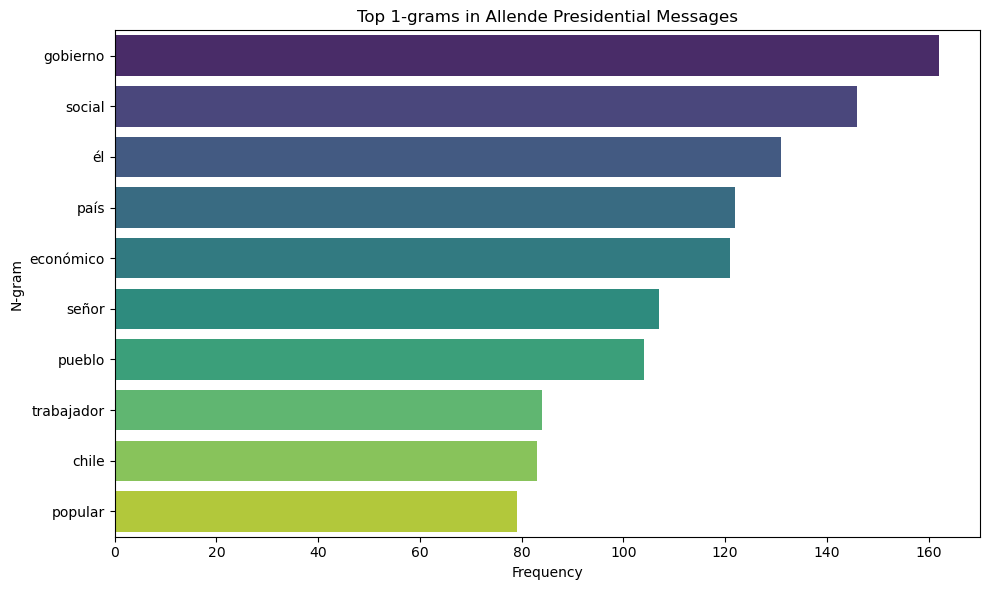


Top 2-grams:
excelentísimo señor: 32
gobierno popular: 18
proceso revolucionario: 18
congreso pleno: 15
millón dólares: 14
propiedad social: 14
diario sesión: 12
libertad política: 12
régimen institucional: 12
sesión senado: 12


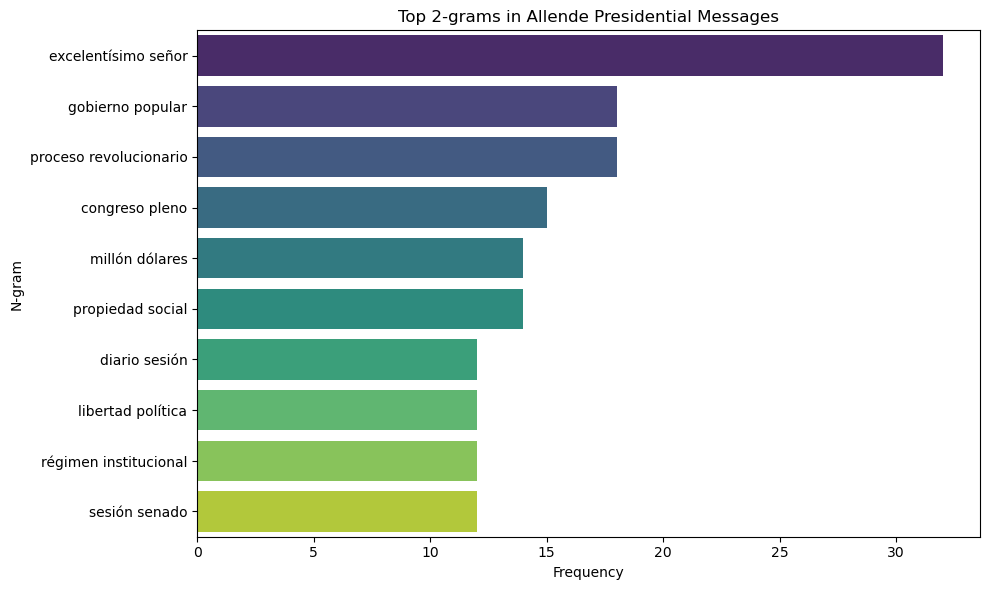


Top 3-grams:
diario sesión senado: 12
área propiedad social: 8
congreso pleno mayo: 7
sesion congreso pleno: 7
honorable senador señor: 4
obrero empleado técnico: 4
conjunto congreso nacional: 3
económico político país: 3
empresa área social: 3
fuerza armadas carabinero: 3


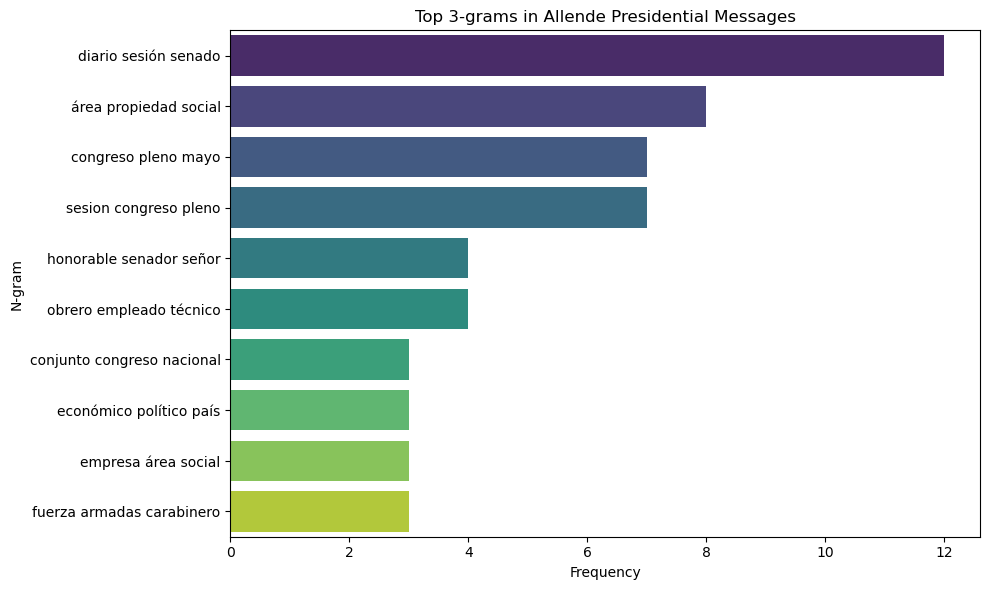

Top N-grams for Pinochet Speeches:

Top 1-grams:
gobierno: 97
chileno: 92
país: 90
chile: 82
él: 77
nacional: 55
fuerza: 51
año: 50
patria: 47
vida: 44


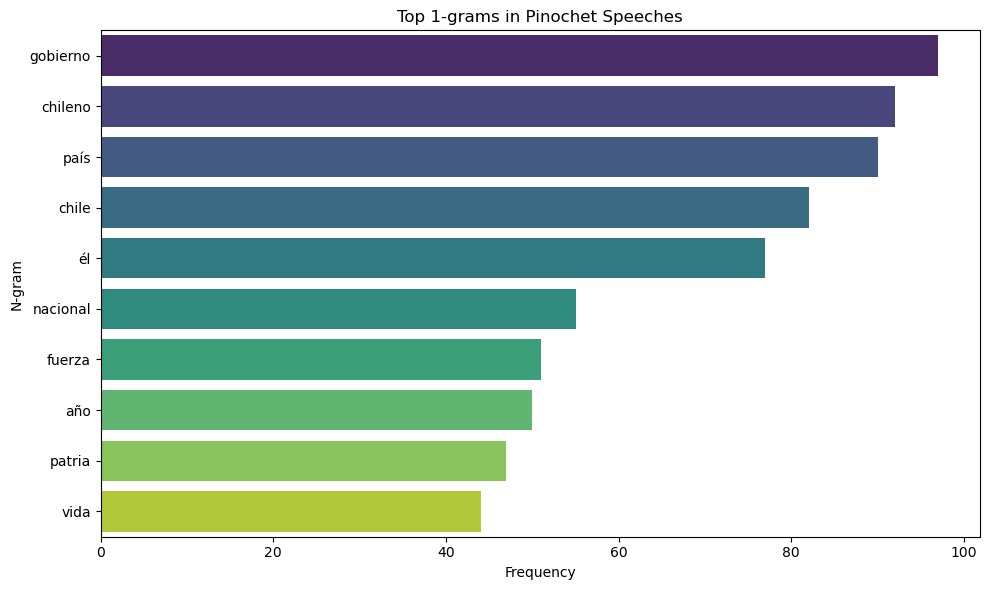


Top 2-grams:
fuerza armado: 14
fuerza armadas: 13
junta gobierno: 12
señora señor: 11
fuerza orden: 10
unidad popular: 10
derechos humanos: 8
trabajador chileno: 8
guerra civil: 7
partido político: 7


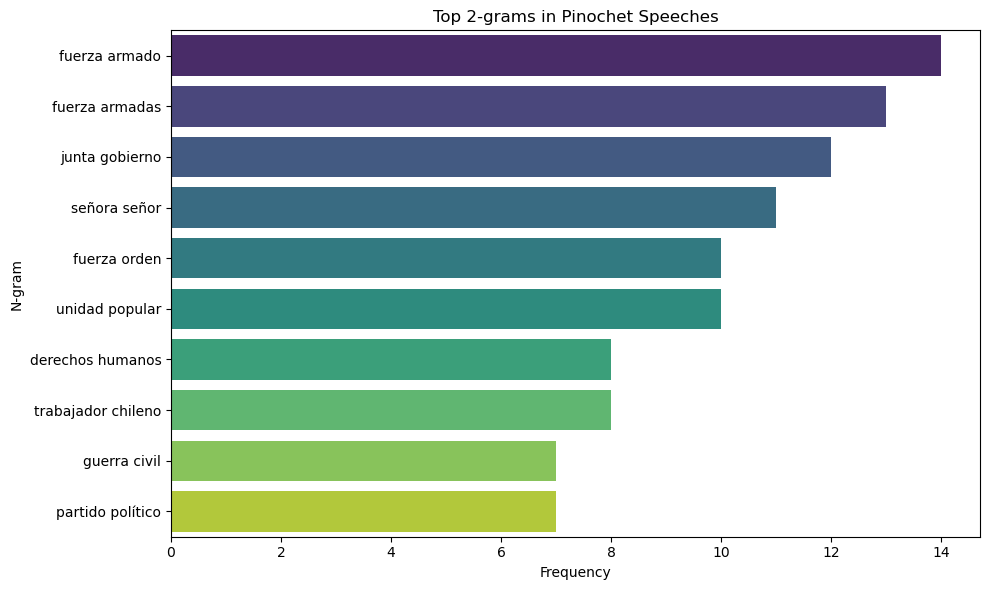


Top 3-grams:
armadas fuerza orden: 6
fuerza armadas carabinero: 6
fuerza armadas fuerza: 6
fuerza armado orden: 5
armado fuerza orden: 4
fuerza armado fuerza: 4
gobierno unidad popular: 4
cobertura agua potable: 3
agua potable alcantarillado: 2
américa latino afectar: 2


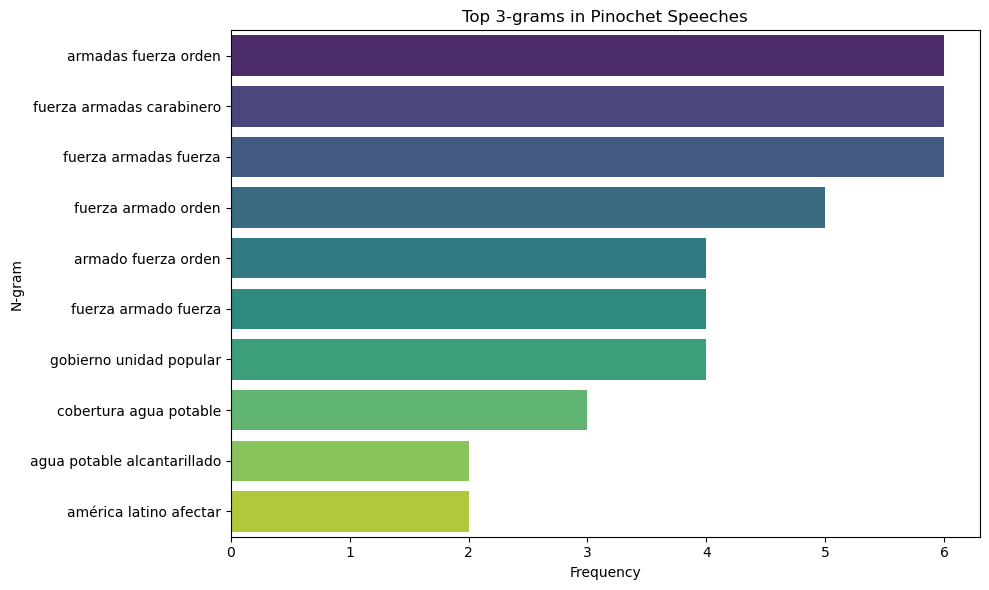

Top N-grams for Pinochet Presidential Messages:

Top 1-grams:
país: 505
gobierno: 475
sector: 444
año: 411
chile: 383
nacional: 353
él: 336
chileno: 317
permitir: 274
desarrollo: 259


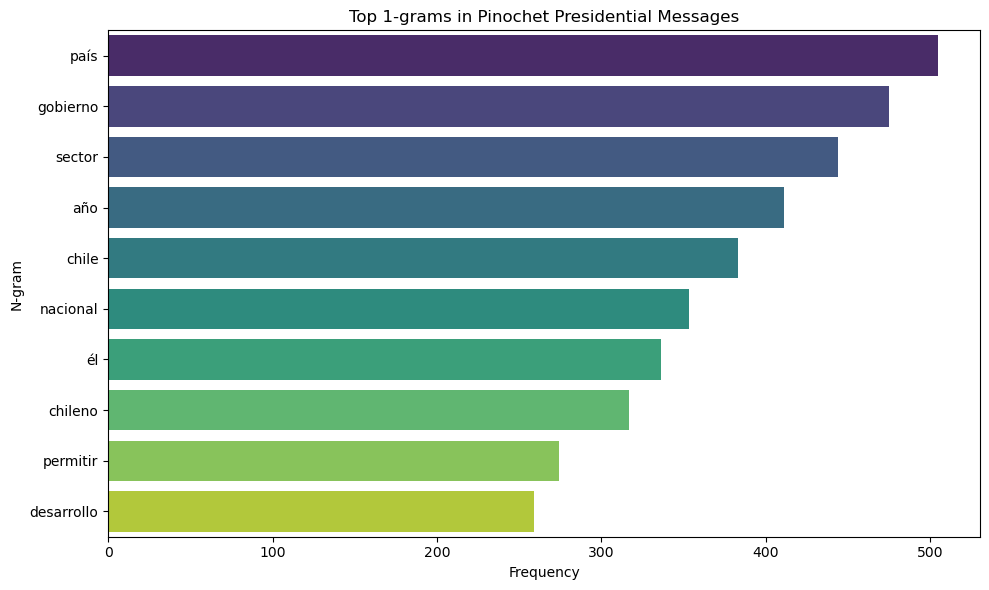


Top 2-grams:
presente año: 64
millón pesos: 63
millón dólares: 59
proyecto ley: 43
sector privado: 43
fuerza orden: 42
ley orgánico: 37
económico social: 34
mil millón: 34
agua potable: 32


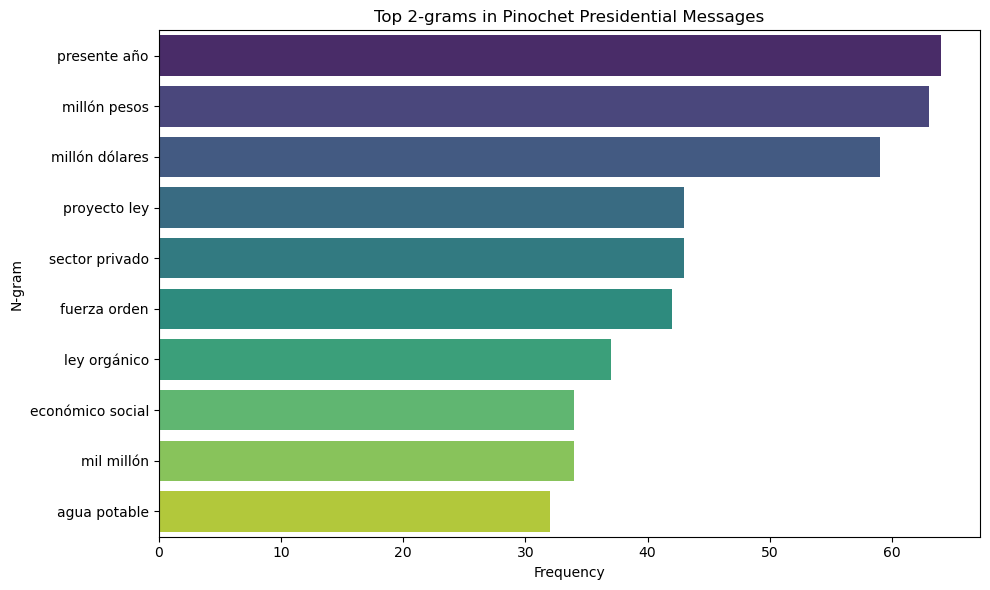


Top 3-grams:
ley orgánico constitucional: 26
mil millón pesos: 26
armadas fuerza orden: 25
fuerza armadas fuerza: 25
honorable junta gobierno: 18
político económico social: 14
institución defensa nacional: 13
legislativo proyecto ley: 13
miembro honorable junta: 13
mil nacido vivo: 12


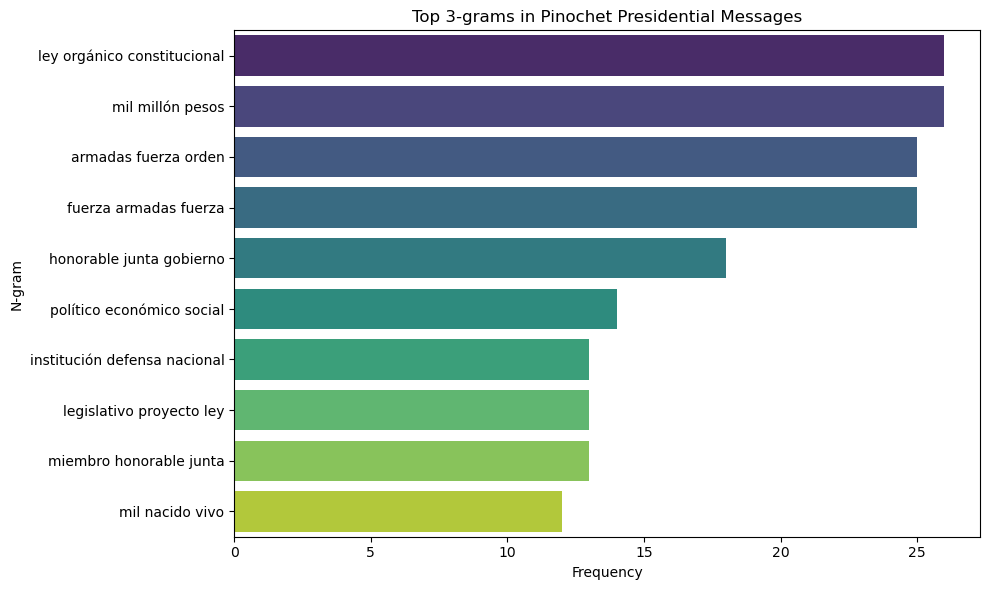

Top N-grams for Resistance Texts:

Top 1-grams:
él: 165
farewell: 160
decir: 158
ver: 95
padre: 77
señor: 76
casa: 72
hablar: 69
querer: 65
mano: 63


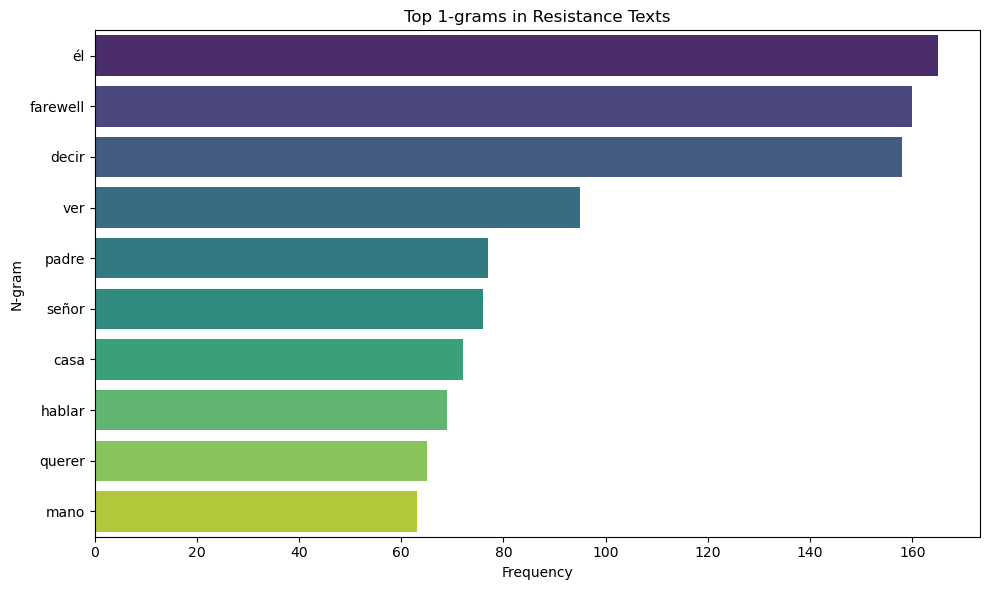


Top 2-grams:
señor odeim: 34
don salvador: 31
cuba cuba: 24
señor oido: 23
maría canales: 22
joven envejecido: 19
padre antonio: 15
pérez larouche: 10
cuba irési: 9
decir farewell: 9


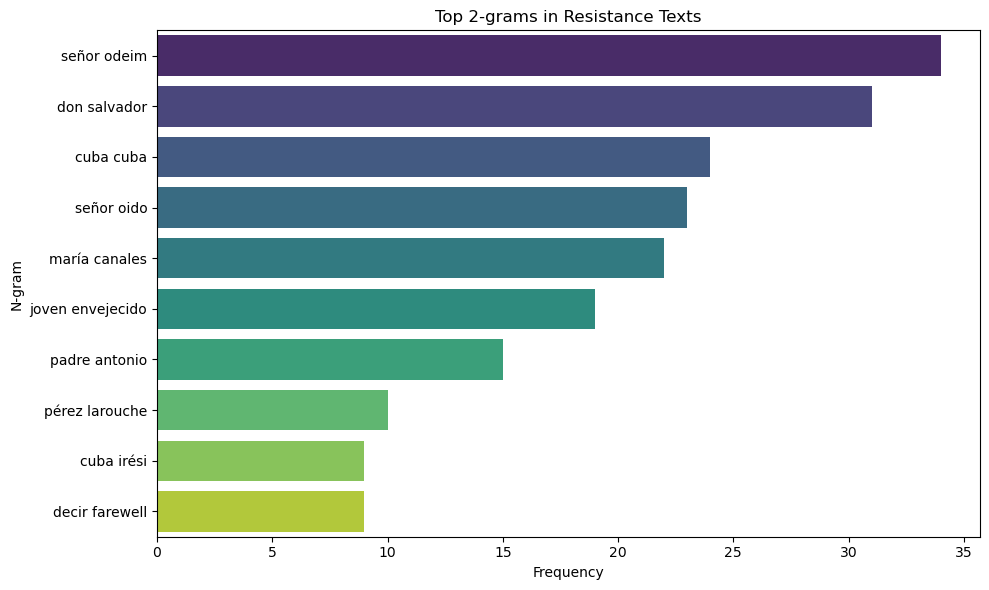


Top 3-grams:
cuba cuba cuba: 12
cuba cuba irési: 9
cuba irési querer: 8
casa maría canales: 5
elemental materialismo histórico: 5
concepto elemental materialismo: 4
don salvador reyes: 4
pelota trapocon gato: 4
pueblo unido jamás: 4
unido jamás vencer: 4


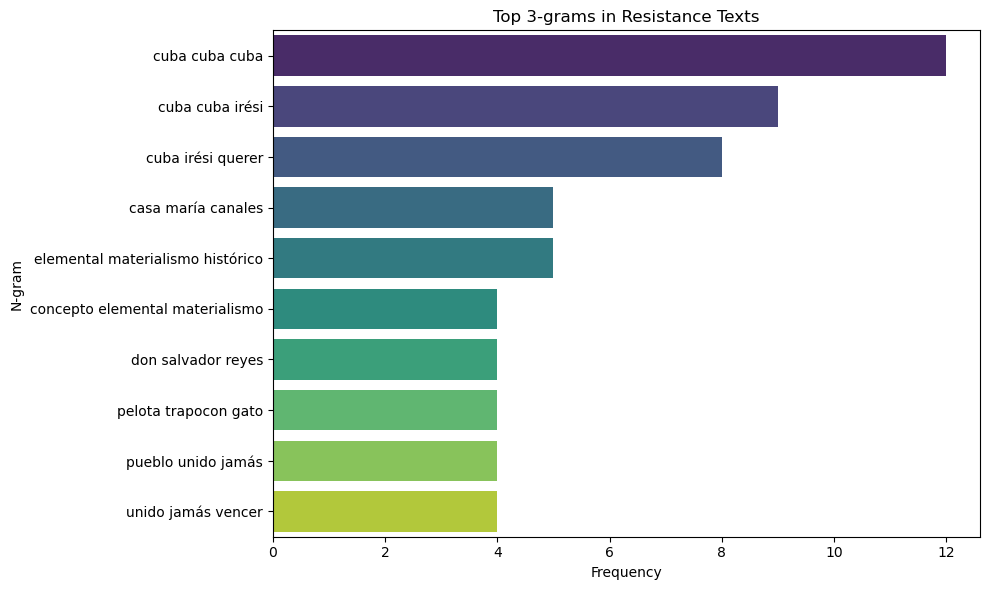

In [57]:
dataframes = {
    "Allende Speeches": df,
    "Allende Presidential Messages": df_allende,
    "Pinochet Speeches": df_pinochet_speeches,
    "Pinochet Presidential Messages": df_pinochet,
    "Resistance Texts": df_resistance,
}

for name, dataframe in dataframes.items():
    print(f"Top N-grams for {name}:")
    for n in [1, 2, 3]:
        ngrams = extract_ngrams(dataframe, n=n, top_n=10)
        print(f"\nTop {n}-grams:")
        for ngram, freq in ngrams:
            print(f"{ngram}: {freq}")
        plot_ngrams(ngrams, title=f"Top {n}-grams in {name}")


There are several graphs here (15 to be exact) which output the 1-gram, 2-gram, and 3-gram frequencies for each of the 5 corpora analyzed: Allende’s speeches, Allende’s presidential messages, Pinochet’s speeches, Pinochet’s presidential messages, and resistance texts. In order to streamline this analysis, I will focus on the 3-grams across all corpora.

#### Allende’s Speeches

The most frequent 3-grams in Allende’s speeches highlight economic and social priorities. Terms like “millón dólares año” (million dollars year), “central única trabajador” (unique central worker), and “área social economía” (social economy area) emphasize Allende’s focus on economic reforms, workers’ rights, and social programs. Phrases like “partido unidad popular” (Popular Unity Party) and “programa unidad popular” reflect his political coalition and its role in his rhetoric. This reinforces Allende’s message of social justice, economic equity, and collective progress.

#### Allende’s Presidential Messages

Allende’s presidential messages have a more institutional tone, with frequent 3-grams like “diario sesión senado” (Senate session diary), “congreso pleno mayo” (full congress May), and “sesión congreso pleno” (full congress session). These phrases emphasize the formal and parliamentary context of his speeches, reflecting his focus on engaging with democratic institutions and legislative processes. Additionally, terms like “área propiedad social” (social property area) and “económico político país” (political economic country) underscore his continued emphasis on economic and social reforms.

#### Pinochet’s Speeches

The dominant 3-grams in Pinochet’s speeches reveal a strong focus on military power and order. Phrases such as “armadas fuerza orden” (armed forces order), “fuerza armadas carabinero” (armed forces police), and “fuerza armadas fuerza” (armed forces) highlight the militaristic and authoritarian tone of his rhetoric. The emphasis on “gobierno unidad popular” (Popular Unity government) also suggests a repeated framing of the previous regime as a target of criticism. Overall, Pinochet’s speeches center heavily on military authority, order, and control.

#### Pinochet’s Presidential Messages

Pinochet’s presidential messages maintain a similar tone but expand into legislative and institutional themes. Frequent 3-grams like “ley orgánico constitucional” (constitutional organic law), “honorable junta gobierno” (honorable government board), and “institución defensa nacional” (national defense institution) point to his focus on restructuring governance and consolidating power. Economic concerns are also present, as seen in “mil millón pesos” (one billion pesos) and “político económico social” (political economic social), reflecting his regime’s attempts to frame stabilization of the country at the forefront of his authoritarian regime.

#### Resistance Texts

In stark contrast, the resistance texts are deeply emotive and symbolic. The most frequent 3-grams, such as “cuba cuba cuba” and “cuba irési querer” (I will go to Cuba if you want), highlight an admiration for Cuba and its revolutionary ideals. Phrases like “sangre llamar canto” (blood call song) and “unido jamás vencer” (united never defeated) emphasize unity, sacrifice, and the call to resistance. This language reflects the poetic and collective nature of resistance writing, centering on hope, solidarity, and defiance against Pinochet’s regime.

#### Conclusion

The 3-grams across the five corpora clearly reflect the ideological and rhetorical differences between Allende, Pinochet, and the resistance movement. Allende’s speeches focus on social justice, workers, and economic reforms, while his presidential messages adopt a more institutional tone. Pinochet’s speeches and messages revolve around militarism, order, and governance, reflecting his authoritarian rule. In contrast, the resistance texts are emotionally charged, highlighting themes of unity, sacrifice, and revolutionary ideals. These distinctions underscore the profound divide in vision and rhetoric during this critical period in Chile’s history.

### Analyzing the linguistic choices of each corpus

In [60]:
for name, dataframe in dataframes.items():
    print(f"Linguistic Style Analysis for {name}:")
    analyze_linguistic_style(dataframe)
    print("-" * 50)

Linguistic Style Analysis for Allende Speeches:
Top Pronouns: [('él', 2468), ('yo', 176), ('cuyo', 123), ('uds', 64), ('alguien', 36), ('sr', 18), ('cualquiera', 17), ('ah', 6), ('raíz', 5), ('estudien', 5)]
Top Verbs: [('decir', 999), ('tener', 757), ('aplauso', 634), ('entender', 583), ('hacer', 554), ('señalar', 531), ('llegar', 528), ('pensar', 512), ('significar', 491), ('dar', 490)]
Top Adjectives: [('trabajador', 1488), ('chileno', 1191), ('país', 818), ('popular', 769), ('nacional', 713), ('económico', 685), ('revolucionario', 679), ('social', 616), ('compañero', 575), ('político', 573)]
Top Adverbs: [('frente', 344), ('fundamentalmente', 247), ('allá', 242), ('mañana', 213), ('ayer', 169), ('lamentablemente', 133), ('cerca', 122), ('tanto', 120), ('jamás', 109), ('acaso', 102)]
--------------------------------------------------
Linguistic Style Analysis for Allende Presidential Messages:
Top Pronouns: [('él', 131), ('cuyo', 14), ('yo', 9), ('mo', 4), ('ro', 2), ('ta', 2), ('ci

#### Allende’s Speeches

Allende’s speeches prominently feature pronouns like “él” (he), “yo” (I), and “cuyo” (whose), emphasizing a personal and inclusive tone. This aligns with his people-centered rhetoric and focus on unity. The dominant verbs include “decir” (to say), “tener” (to have), and “aplauso” (to applaud), reflecting his frequent communication of ideas and appreciation of collective achievements. In terms of adjectives, “trabajador” (worker), “chileno” (Chilean), and “nacional” (national) highlight his focus on workers, national identity, and socialism. The top adverbs—“frente” (facing), “fundamentalmente” (fundamentally), and “mañana” (tomorrow)—suggest a forward-looking and foundational tone, consistent with his reformist ideals.

#### Allende’s Presidential Messages

Allende’s formal addresses shift toward a legislative and institutional focus. Pronouns like “él”, “cuyo”, and “yo” remain, but in smaller quantities, reflecting a more formal tone. Verbs like “crear” (to create), “permitir” (to allow), and “exigir” (to demand) underscore discussions on policies, reforms, and governance. Adjectives such as “social”, “económico” (economic), and “popular” point to his emphasis on structural reforms and social welfare.

#### Pinochet’s Speeches

Pinochet’s speeches reveal a more restrained, institutional tone dominated by control and governance. Verbs such as “permitir” (to allow), “cumplir” (to fulfill), and “constituir” (to constitute) emphasize compliance, structure, and formal governance. Adjectives like “chileno”, “nacional”, and “político” reflect a strong emphasis on national identity and institutional policies.

#### Pinochet’s Presidential Messages

Again, Verbs like “permitir” (to allow), “alcanzar” (to achieve), and “continuar” (to continue) emphasize persistence, achievement, and structure. The most frequent adjectives—“nacional”, “chileno”, and “económico”—reiterate themes of national governance and economic pragmatism.

#### Resistance Texts

The resistance texts stand in sharp contrast, with a more emotive and personal linguistic style. The dominant verbs—“decir” (to say), “ver” (to see), and “hablar” (to speak)—indicate a focus on communication, reflection, and testimony. Adjectives like “general”, “chileno”, and “joven” (young) highlight broad themes of identity, hope, and generational struggle. The use of adverbs—“jamás” (never), “allá” (there), and “mañana” (tomorrow)—reflects the emotional and forward-looking tone of the resistance, centered on hope, defiance, and a vision for change.

#### Conclusion

The linguistic style analysis highlights stark contrasts between Allende, Pinochet, and the resistance texts. Allende’s language reflects inclusivity, forward-looking optimism, and social justice, while his presidential messages adopt a more pragmatic, institutional tone. Pinochet’s speeches and messages are dominated by authority, national identity, and control, using formal and depersonalized language to justify his regime. In contrast, the resistance texts are deeply emotive, focusing on communication, solidarity, and hope, providing a powerful counter-narrative to the authoritarian discourse of Pinochet’s rule.

## 4. Discussion and conclusions